First 5 rows of dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Missing values in each column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Linear Regression - MSE: 3.3886, R²: 0.8529
Random Forest - MSE: 0.9100, R²: 0.9605


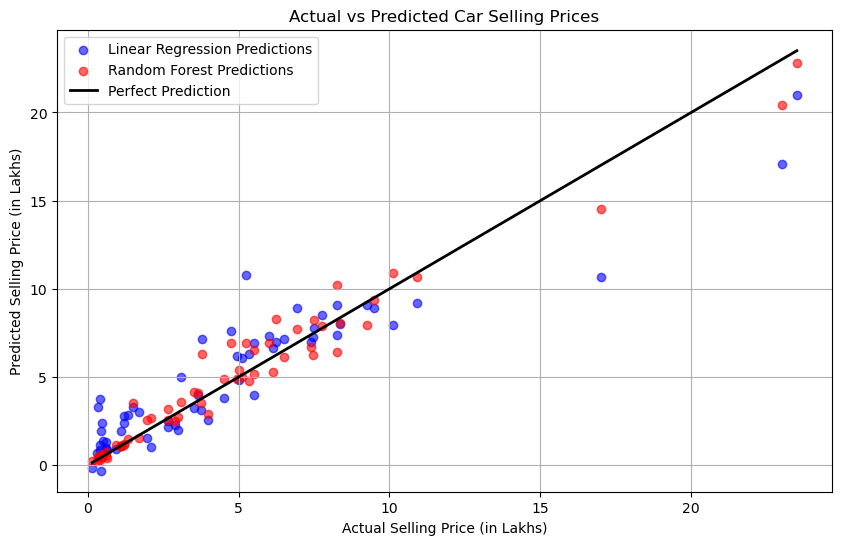

In [1]:
# Car Price Prediction with Machine Learning in Python (Jupyter Notebook Style)

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from the provided path
file_path = r"C:\\Users\\omshe\\Downloads\\archive (1)\\car data.csv"
df = pd.read_csv(file_path)

# Display first 5 rows to verify loading
print("First 5 rows of dataset:")
print(df.head())

# Data Preprocessing
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values if any
df.dropna(inplace=True)

# Convert categorical variables into one-hot encoding
# Here we encode Fuel_Type and Transmission columns as example
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission'], drop_first=True)

# Feature Engineering
# Create a new feature: Age of the car (assuming current year 2025 for example)
df['Age'] = 2025 - df['Year']

# We define features to include brand goodwill, horsepower, mileage, age, and encoded vars
# Since horsepower and exact brand goodwill are not present in this dataset, 
# let's use available relevant columns:
# Present_Price (current ex-showroom price), Driven_kms (kilometers run), Age, Fuel_Type_Diesel, Fuel_Type_Petrol, Transmission_Manual

X = df[['Present_Price', 'Driven_kms', 'Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Manual']]

# Target variable: Selling price
y = df['Selling_Price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation

# Predictions on test set
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"\nLinear Regression - MSE: {mse_linear:.4f}, R²: {r2_linear:.4f}")
print(f"Random Forest - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")

# Visualization of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Linear Regression Predictions')
plt.scatter(y_test, y_pred_rf, color='red', alpha=0.6, label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price (in Lakhs)')
plt.ylabel('Predicted Selling Price (in Lakhs)')
plt.title('Actual vs Predicted Car Selling Prices')
plt.legend()
plt.grid(True)
plt.show()

